<a href="https://colab.research.google.com/github/reply2vikas/Project-1/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-08-06 15:06:35.143067


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model
from keras.datasets import mnist
print(datetime.datetime.now())

2019-08-06 15:07:32.164199


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-08-06 15:07:49.960794


(60000, 28, 28)
2019-08-06 15:08:05.057909


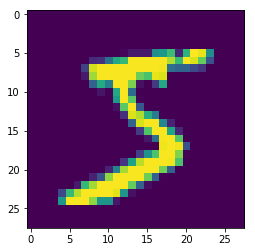

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-08-06 15:08:19.562617


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-08-06 15:08:34.016261


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-08-06 15:08:45.466957


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-08-06 15:08:58.302916


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-08-06 15:09:05.550038


In [10]:
##MAIN BLOCK
x1 = Input(shape=(28,28,1))

x2 = Convolution2D(15, 3, 3, activation='relu', border_mode='same')(x1)
batch_norm_1 = BatchNormalization()(x2)
dropout_1 = Dropout(0.1)(batch_norm_1)

merge1 = concatenate([x1, dropout_1])

x3 = Convolution2D(30, 3, 3, activation='relu', border_mode='same')(merge1)
batch_norm_2 = BatchNormalization()(x3)
dropout_2 = Dropout(0.1)(batch_norm_2)

merge2 = concatenate([x1, dropout_1, dropout_2])

x4 = MaxPooling2D(pool_size=(2, 2))(merge2)

x5 = Convolution2D(15, 3, 3, activation='relu', border_mode='same')(x4)
batch_norm_3 = BatchNormalization()(x5)
dropout_3 = Dropout(0.1)(batch_norm_3)

merge3 = concatenate([x4,dropout_3])

x6 = Convolution2D(30, 3, 3, activation='relu', border_mode='same')(merge3)
batch_norm_4 = BatchNormalization()(x6)
dropout_4 = Dropout(0.1)(batch_norm_4)

merge4 = concatenate([x4,dropout_3,dropout_4])

x7 = Convolution2D(45, 3, 3, activation='relu', border_mode='same')(merge4)
batch_norm_5 = BatchNormalization()(x7)
dropout_5 = Dropout(0.1)(batch_norm_5)

merge5 = concatenate([dropout_3,dropout_4,dropout_5])

x8 = MaxPooling2D(pool_size=(2, 2))(merge5)

x9 = Convolution2D(15, 3, 3, activation='relu', border_mode='same')(x8)
batch_norm_6 = BatchNormalization()(x9)
dropout_6 = Dropout(0.1)(batch_norm_6)

merge6 = concatenate([x8,dropout_6])

x10 = Convolution2D(30, 3, 3, activation='relu', border_mode='same')(merge6)
batch_norm_7 = BatchNormalization()(x10)
dropout_7 = Dropout(0.1)(batch_norm_7)

merge7 = concatenate([x8,dropout_6,dropout_7])

x11 = Convolution2D(45, 3, 3, activation='relu', border_mode='same')(merge7)
batch_norm_8 = BatchNormalization()(x11)
dropout_8 = Dropout(0.1)(batch_norm_8)

x12 = Convolution2D(10, 7,)(dropout_8)

flat1 = Flatten()(x12)
output = Activation('softmax')(flat1)

model = Model(inputs=x1, outputs=output)
print(datetime.datetime.now())

W0806 15:09:48.045605 139911411767168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 15:09:48.086293 139911411767168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0806 15:09:48.097245 139911411767168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 15:09:48.135388 1

2019-08-06 15:09:51.983377


In [11]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 15)   150         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 15)   60          conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 28, 28, 15)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
concatenat

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0806 15:10:34.050719 139911411767168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



2019-08-06 15:10:34.097951


In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0806 15:11:05.372743 139911411767168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.1011 - acc: 0.9690
Epoch 2/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0445 - acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0338 - acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.0283 - acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0225 - acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0181 - acc: 0.9943
Epoch 7/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.0132 - acc: 0.9959
Epoch 8/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.0140 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0117 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 26s 436us/step - loss: 

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-08-06 15:15:51.589372


In [16]:
print(score)
print(datetime.datetime.now())

[0.02477717818635524, 0.994]
2019-08-06 15:16:24.323573
